<a href="https://colab.research.google.com/github/dango80/Models_examples/blob/main/examples_colab_notebooks/lazypredict_model_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lazypredict
!pip install precise
!pip install --upgrade pandas 

     |████████████████████████████████| 72 kB 973 kB/s 
     |████████████████████████████████| 302 kB 28.9 MB/s 
     |████████████████████████████████| 127.6 MB 1.2 MB/s 
     |████████████████████████████████| 1.2 MB 65.4 MB/s 
     |████████████████████████████████| 269 kB 71.7 MB/s 
     |████████████████████████████████| 248 kB 54.3 MB/s 
     |████████████████████████████████| 25.9 MB 1.2 MB/s 
     |████████████████████████████████| 14.5 MB 52.6 MB/s 
     |████████████████████████████████| 10.1 MB 83.5 MB/s 
     |████████████████████████████████| 6.8 MB 66.9 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=9f866153ca549cb8afb2c2b691c5791bf279061caddd7fda42e33bf0898cb0c6
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully

     |████████████████████████████████| 122 kB 13.8 MB/s 
     |████████████████████████████████| 93 kB 1.7 MB/s 
     |████████████████████████████████| 61 kB 8.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 88 kB 8.1 MB/s 
     |████████████████████████████████| 2.8 MB 54.9 MB/s 
     |████████████████████████████████| 11.2 MB 52.7 MB/s 
     |████████████████████████████████| 149 kB 87.5 MB/s 
     |████████████████████████████████| 902 kB 79.0 MB/s 
     |████████████████████████████████| 9.8 MB 64.0 MB/s 
     |████████████████████████████████| 930 kB 77.8 MB/s 
     |████████████████████████████████| 32.7 MB 1.2 MB/s 
  Created wheel for collinearity: filename=collinearity-0.6.1-py3-none-any.whl size=4460 sha256=fd4de36ace983e3c0e5cfc565957250b5f8532e5883278a1ded88d9e7ef2dcc0
  Stored in directory: /root/.cache/pip/wheels/31/bf/74/0a475ad9095545c56fe02d678ccd38739baa81513e877d91ca
  Created wheel for latextable: filename=

     |████████████████████████████████| 11.3 MB 14.6 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lazypredict 0.2.9 requires pandas==1.0.5, but you have pandas 1.3.5 which is incompatible.
lazypredict 0.2.9 requires scipy==1.5.4, but you have scipy 1.7.3 which is incompatible.


## Using LazyPredict and Precise to construct a portfolio of models 


*   [LazyPredict](https://github.com/shankarpandala/lazypredict) is a package that generates a slew of sklearn models 
*   [Precise](https://github.com/microprediction/precise) is a package that builds portfolios. 

Let's see if a convex combination (long portfolio) of models performs better than just picking the best out of sample model. I use the data example pulled straight from the LazyPredict README, in turn borrowed from sklearn. 

In [5]:
import pandas as pd
import numpy as np

In [1]:
import lazypredict

In [3]:
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [8]:
# Load dataset
data = load_breast_cancer()
X = data.data
y= data.target

In [9]:
# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)

In [18]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:00<00:00, 53465.85it/s]


In [19]:
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.15
ExtraTreesClassifier,1.00,1.00,1.00,1.00,0.14
XGBClassifier,1.00,1.00,1.00,1.00,0.10
RandomForestClassifier,1.00,1.00,1.00,1.00,0.24
LabelSpreading,1.00,1.00,1.00,1.00,0.04
LabelPropagation,1.00,1.00,1.00,1.00,0.03
LGBMClassifier,1.00,1.00,1.00,1.00,0.14
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.01
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.03


In [20]:
predictions_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.15
ExtraTreesClassifier,1.00,1.00,1.00,1.00,0.14
XGBClassifier,1.00,1.00,1.00,1.00,0.10
RandomForestClassifier,1.00,1.00,1.00,1.00,0.24
LabelSpreading,1.00,1.00,1.00,1.00,0.04
LabelPropagation,1.00,1.00,1.00,1.00,0.03
LGBMClassifier,1.00,1.00,1.00,1.00,0.14
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.01
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.03


In [21]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,


In [22]:
predictions_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'AdaBoostClassifier'),
  Text(1, 0, 'ExtraTreesClassifier'),
  Text(2, 0, 'XGBClassifier'),
  Text(3, 0, 'RandomForestClassifier'),
  Text(4, 0, 'LabelSpreading'),
  Text(5, 0, 'LabelPropagation'),
  Text(6, 0, 'LGBMClassifier'),
  Text(7, 0, 'ExtraTreeClassifier'),
  Text(8, 0, 'DecisionTreeClassifier'),
  Text(9, 0, 'BaggingClassifier'),
  Text(10, 0, 'SVC'),
  Text(11, 0, 'LogisticRegression'),
  Text(12, 0, 'LinearSVC'),
  Text(13, 0, 'PassiveAggressiveClassifier'),
  Text(14, 0, 'SGDClassifier'),
  Text(15, 0, 'Perceptron'),
  Text(16, 0, 'KNeighborsClassifier'),
  Text(17, 0, 'QuadraticDiscriminantAnalysis'),
  Text(18, 0, 'CalibratedClassifierCV'),
  Text(19, 0, 'RidgeClassifier'),
  Text(20, 0, 'RidgeClassifierCV'),
  Text(21, 0, 'LinearDiscriminantAnalysis'),
  Text(22, 0, 'NuSVC'),
  Text(23, 0, 'GaussianNB'),
  Text(24, 0, 'BernoulliNB'),

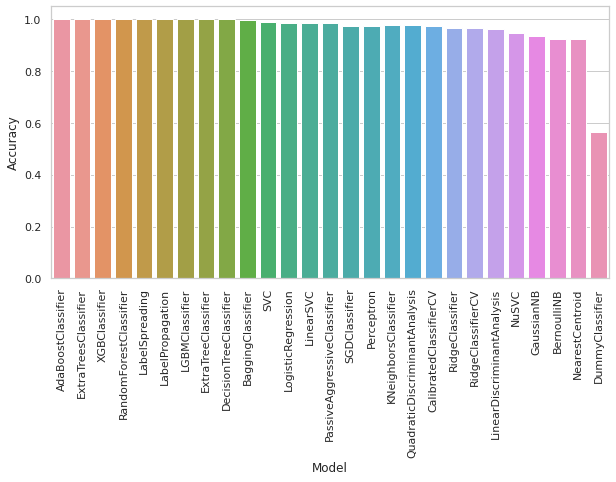

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=models_train.index, y="Accuracy", data=models_train)
plt.xticks(rotation=90)

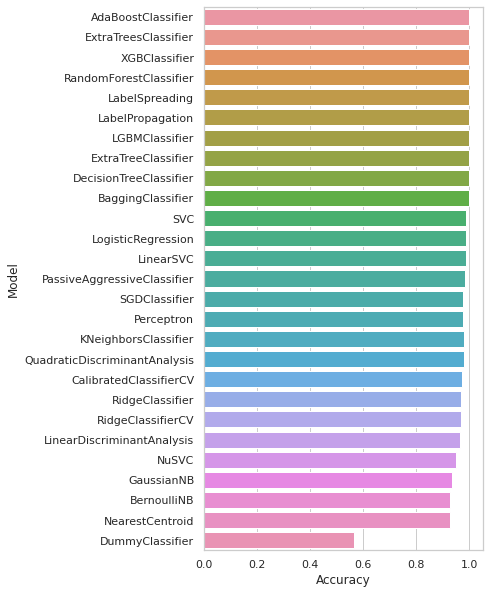

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="Accuracy", data=models_train)

Regression Task
---

In [25]:
# Import libraries
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

# Load dataset
boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state=42)

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)

# Defines and builds the lazyclassifier
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models_train,predictions_train = reg.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = reg.fit(X_train, X_test, y_train, y_test)

# Prints the model performance
models_train

100%|██████████| 42/42 [00:00<00:00, 8719.10it/s]

tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to ex

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,1.00,1.00,0.00,0.03
DecisionTreeRegressor,1.00,1.00,0.00,0.02
ExtraTreeRegressor,1.00,1.00,0.00,0.01
ExtraTreesRegressor,1.00,1.00,0.00,0.19
XGBRegressor,1.00,1.00,0.03,0.06
RandomForestRegressor,0.98,0.98,1.27,0.30
HistGradientBoostingRegressor,0.98,0.98,1.36,0.22
GradientBoostingRegressor,0.98,0.98,1.38,0.17
LGBMRegressor,0.98,0.98,1.39,0.05


In [26]:
models_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


In [30]:
reg

In [32]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

models

100%|██████████| 42/42 [00:02<00:00, 15.00it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.88,0.90,2.79,0.17
ExtraTreesRegressor,0.87,0.88,2.95,0.23
XGBRegressor,0.86,0.88,2.96,0.06
RandomForestRegressor,0.86,0.88,2.98,0.30
BaggingRegressor,0.86,0.88,3.00,0.06
LGBMRegressor,0.85,0.87,3.09,0.05
HistGradientBoostingRegressor,0.85,0.87,3.12,0.22
AdaBoostRegressor,0.79,0.81,3.72,0.16
PoissonRegressor,0.78,0.81,3.80,0.01


SyntaxError: ignored